# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.patches import ConnectionPatch
import warnings
from sklearn.model_selection import train_test_split
warnings.simplefilter("ignore")

## Importing Dataset

In [2]:
#import dataset
data=pd.read_csv('framingham.csv')
data.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


## Checking NULL values

In [3]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
data.count()

male               4240
age                4240
education          4135
currentSmoker      4240
cigsPerDay         4211
BPMeds             4187
prevalentStroke    4240
prevalentHyp       4240
diabetes           4240
totChol            4190
sysBP              4240
diaBP              4240
BMI                4221
heartRate          4239
glucose            3852
TenYearCHD         4240
dtype: int64

In [6]:
data.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [7]:
data.shape


(4240, 16)

# Basic  Statistics of the data

In [8]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# Handling of missing values ,Outliners and Duplicate Data

In [9]:
#to check for the duplicate
duplicate_data=data[data.duplicated()]
duplicate_data.shape

(0, 16)

## Get the name of missinmg columns and  no. of missing data in the respective columns

In [10]:
#get the name of missinmg columns and  no. of missing data in the respective columns
print(data.columns[data.isnull().any()])
print(data.isnull().sum())


Index(['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate',
       'glucose'],
      dtype='object')
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


## find the rows with the missing data and remove the data

In [11]:
#find the rows with the missing data and remove the data
null=data[data.isnull().any(axis=1)]
print(data.isnull().sum().sum())
data.shape

645


(4240, 16)

# Visualization

## Density

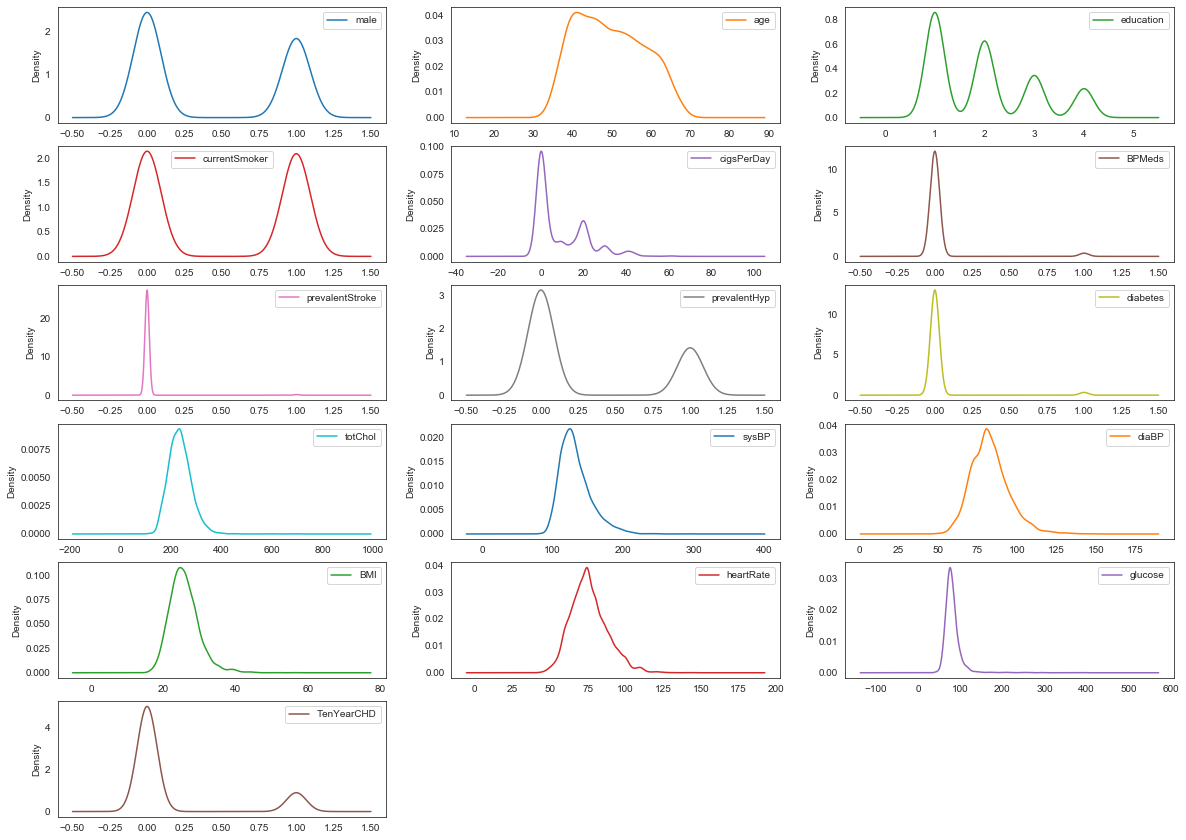

In [12]:
sb.set_style("white")
data.plot(kind='density', subplots=True, layout=(8,3), sharex=False,figsize=(20,20))
plt.show()

## Histogram

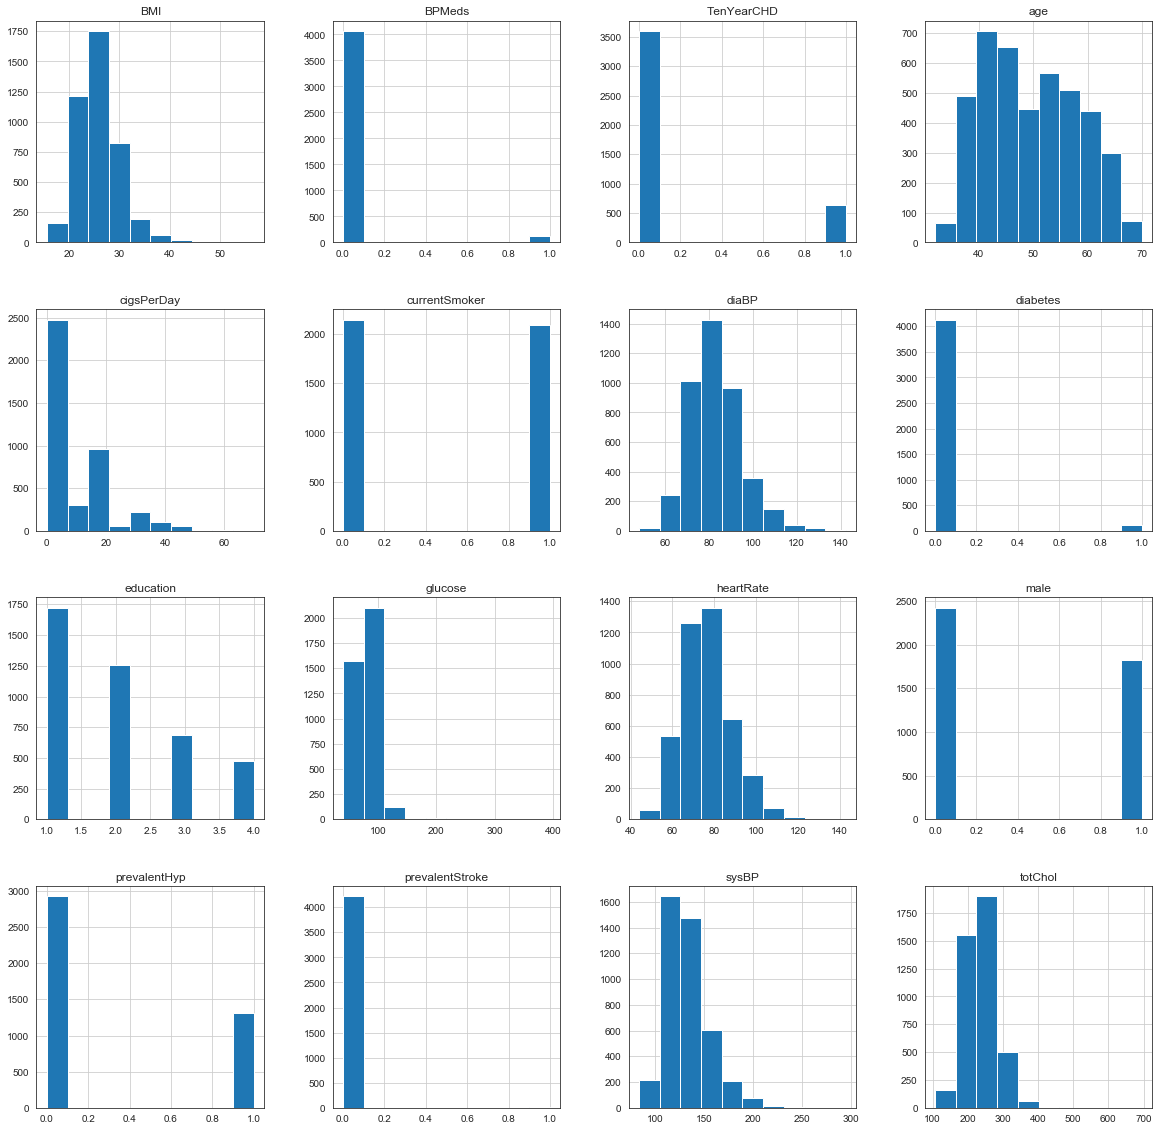

In [13]:
sb.set_style("white")
data.hist(figsize=(20,20))
plt.show()

# Removing of columns

In [14]:
#here we are dropping the education column since it is not related to the objective or in predicting the outcome of  the variable
data=data.drop(['education'],axis=1)

print(data.isnull().sum().sum())
data=data.dropna()
print(data.isnull().sum().sum())
data.shape

540
0


(3751, 15)

# Important feature Selection

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
array=data.values
X=data.iloc[:,0:14]
Y=data.iloc[:,14]
test = SelectKBest(score_func=chi2, k=10)
fit=test.fit(X,Y)

dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)

impfeature_Scores=pd.concat([dfcolumns,dfscores],axis=1)
impfeature_Scores.columns=['feature','Score']

impfeature_Scores=impfeature_Scores.sort_values('Score',ascending=False)
print(impfeature_Scores)

            feature       Score
9             sysBP  667.109932
13          glucose  402.409837
1               age  297.974980
8           totChol  252.958627
3        cigsPerDay  185.115196
10            diaBP  142.920436
6      prevalentHyp   82.342164
7          diabetes   31.711253
4            BPMeds   26.116583
0              male   19.178560
11              BMI   17.108210
5   prevalentStroke    8.480982
12        heartRate    3.635480
2     currentSmoker    0.904429


In [16]:
ifeature=impfeature_Scores.iloc[0:10,:]
print(ifeature)
columnname=ifeature["feature"].tolist()
print(columnname)

         feature       Score
9          sysBP  667.109932
13       glucose  402.409837
1            age  297.974980
8        totChol  252.958627
3     cigsPerDay  185.115196
10         diaBP  142.920436
6   prevalentHyp   82.342164
7       diabetes   31.711253
4         BPMeds   26.116583
0           male   19.178560
['sysBP', 'glucose', 'age', 'totChol', 'cigsPerDay', 'diaBP', 'prevalentHyp', 'diabetes', 'BPMeds', 'male']


In [17]:
columnname.append("TenYearCHD")
newdata=data[columnname]

In [18]:
newdata.head(10)

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
0,106.0,77.0,39,195.0,0.0,70.0,0,0,0.0,1,0
1,121.0,76.0,46,250.0,0.0,81.0,0,0,0.0,0,0
2,127.5,70.0,48,245.0,20.0,80.0,0,0,0.0,1,0
3,150.0,103.0,61,225.0,30.0,95.0,1,0,0.0,0,1
4,130.0,85.0,46,285.0,23.0,84.0,0,0,0.0,0,0
5,180.0,99.0,43,228.0,0.0,110.0,1,0,0.0,0,0
6,138.0,85.0,63,205.0,0.0,71.0,0,0,0.0,0,1
7,100.0,78.0,45,313.0,20.0,71.0,0,0,0.0,0,0
8,141.5,79.0,52,260.0,0.0,89.0,1,0,0.0,1,0
9,162.0,88.0,43,225.0,30.0,107.0,1,0,0.0,1,0


In [19]:
newdata.describe()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,132.368435,81.880032,49.573447,236.928019,9.008531,82.938550,0.311917,0.027193,0.030392,0.445215,0.152493
std,22.046522,23.882233,8.570204,44.611594,11.925097,11.932779,0.463338,0.162666,0.171686,0.497056,0.359546
min,83.500000,40.000000,32.000000,113.000000,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,117.000000,71.000000,42.000000,206.000000,0.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,128.000000,78.000000,49.000000,234.000000,0.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,144.000000,87.000000,56.000000,264.000000,20.000000,90.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,295.000000,394.000000,70.000000,696.000000,70.000000,142.500000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
Q1=newdata.quantile(0.25)
Q3=newdata.quantile(0.75)
IQR=Q3-Q1
print(IQR)


sysBP           27.0
glucose         16.0
age             14.0
totChol         58.0
cigsPerDay      20.0
diaBP           15.0
prevalentHyp     1.0
diabetes         0.0
BPMeds           0.0
male             1.0
TenYearCHD       0.0
dtype: float64


In [21]:
cutoff=IQR*1.5
lower_limit,upper_limit=Q1-cutoff,Q3+cutoff
xyz=(newdata<lower_limit)|(newdata>upper_limit)
print(xyz)

      sysBP  glucose    age  totChol  cigsPerDay  diaBP  prevalentHyp  \
0     False    False  False    False       False  False         False   
1     False    False  False    False       False  False         False   
2     False    False  False    False       False  False         False   
3     False    False  False    False       False  False         False   
4     False    False  False    False       False  False         False   
...     ...      ...    ...      ...         ...    ...           ...   
4233  False    False  False    False       False  False         False   
4234  False    False  False    False       False  False         False   
4237  False    False  False    False       False  False         False   
4238  False    False  False    False       False  False         False   
4239  False    False  False    False       False  False         False   

      diabetes  BPMeds   male  TenYearCHD  
0        False   False  False       False  
1        False   False  False      

In [22]:

idx = xyz.apply(lambda ts: any(ts == True), axis=1)
xyz[idx]

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
3,False,False,False,False,False,False,False,False,False,False,True
6,False,False,False,False,False,False,False,False,False,False,True
13,False,False,False,False,False,False,False,False,True,False,False
15,False,False,False,False,False,False,False,False,False,False,True
17,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
4223,False,False,False,False,False,False,False,False,True,False,True
4226,False,False,False,False,False,False,False,False,False,False,True
4228,True,True,False,False,False,True,False,True,False,False,False
4232,False,False,False,False,False,False,False,False,False,False,True


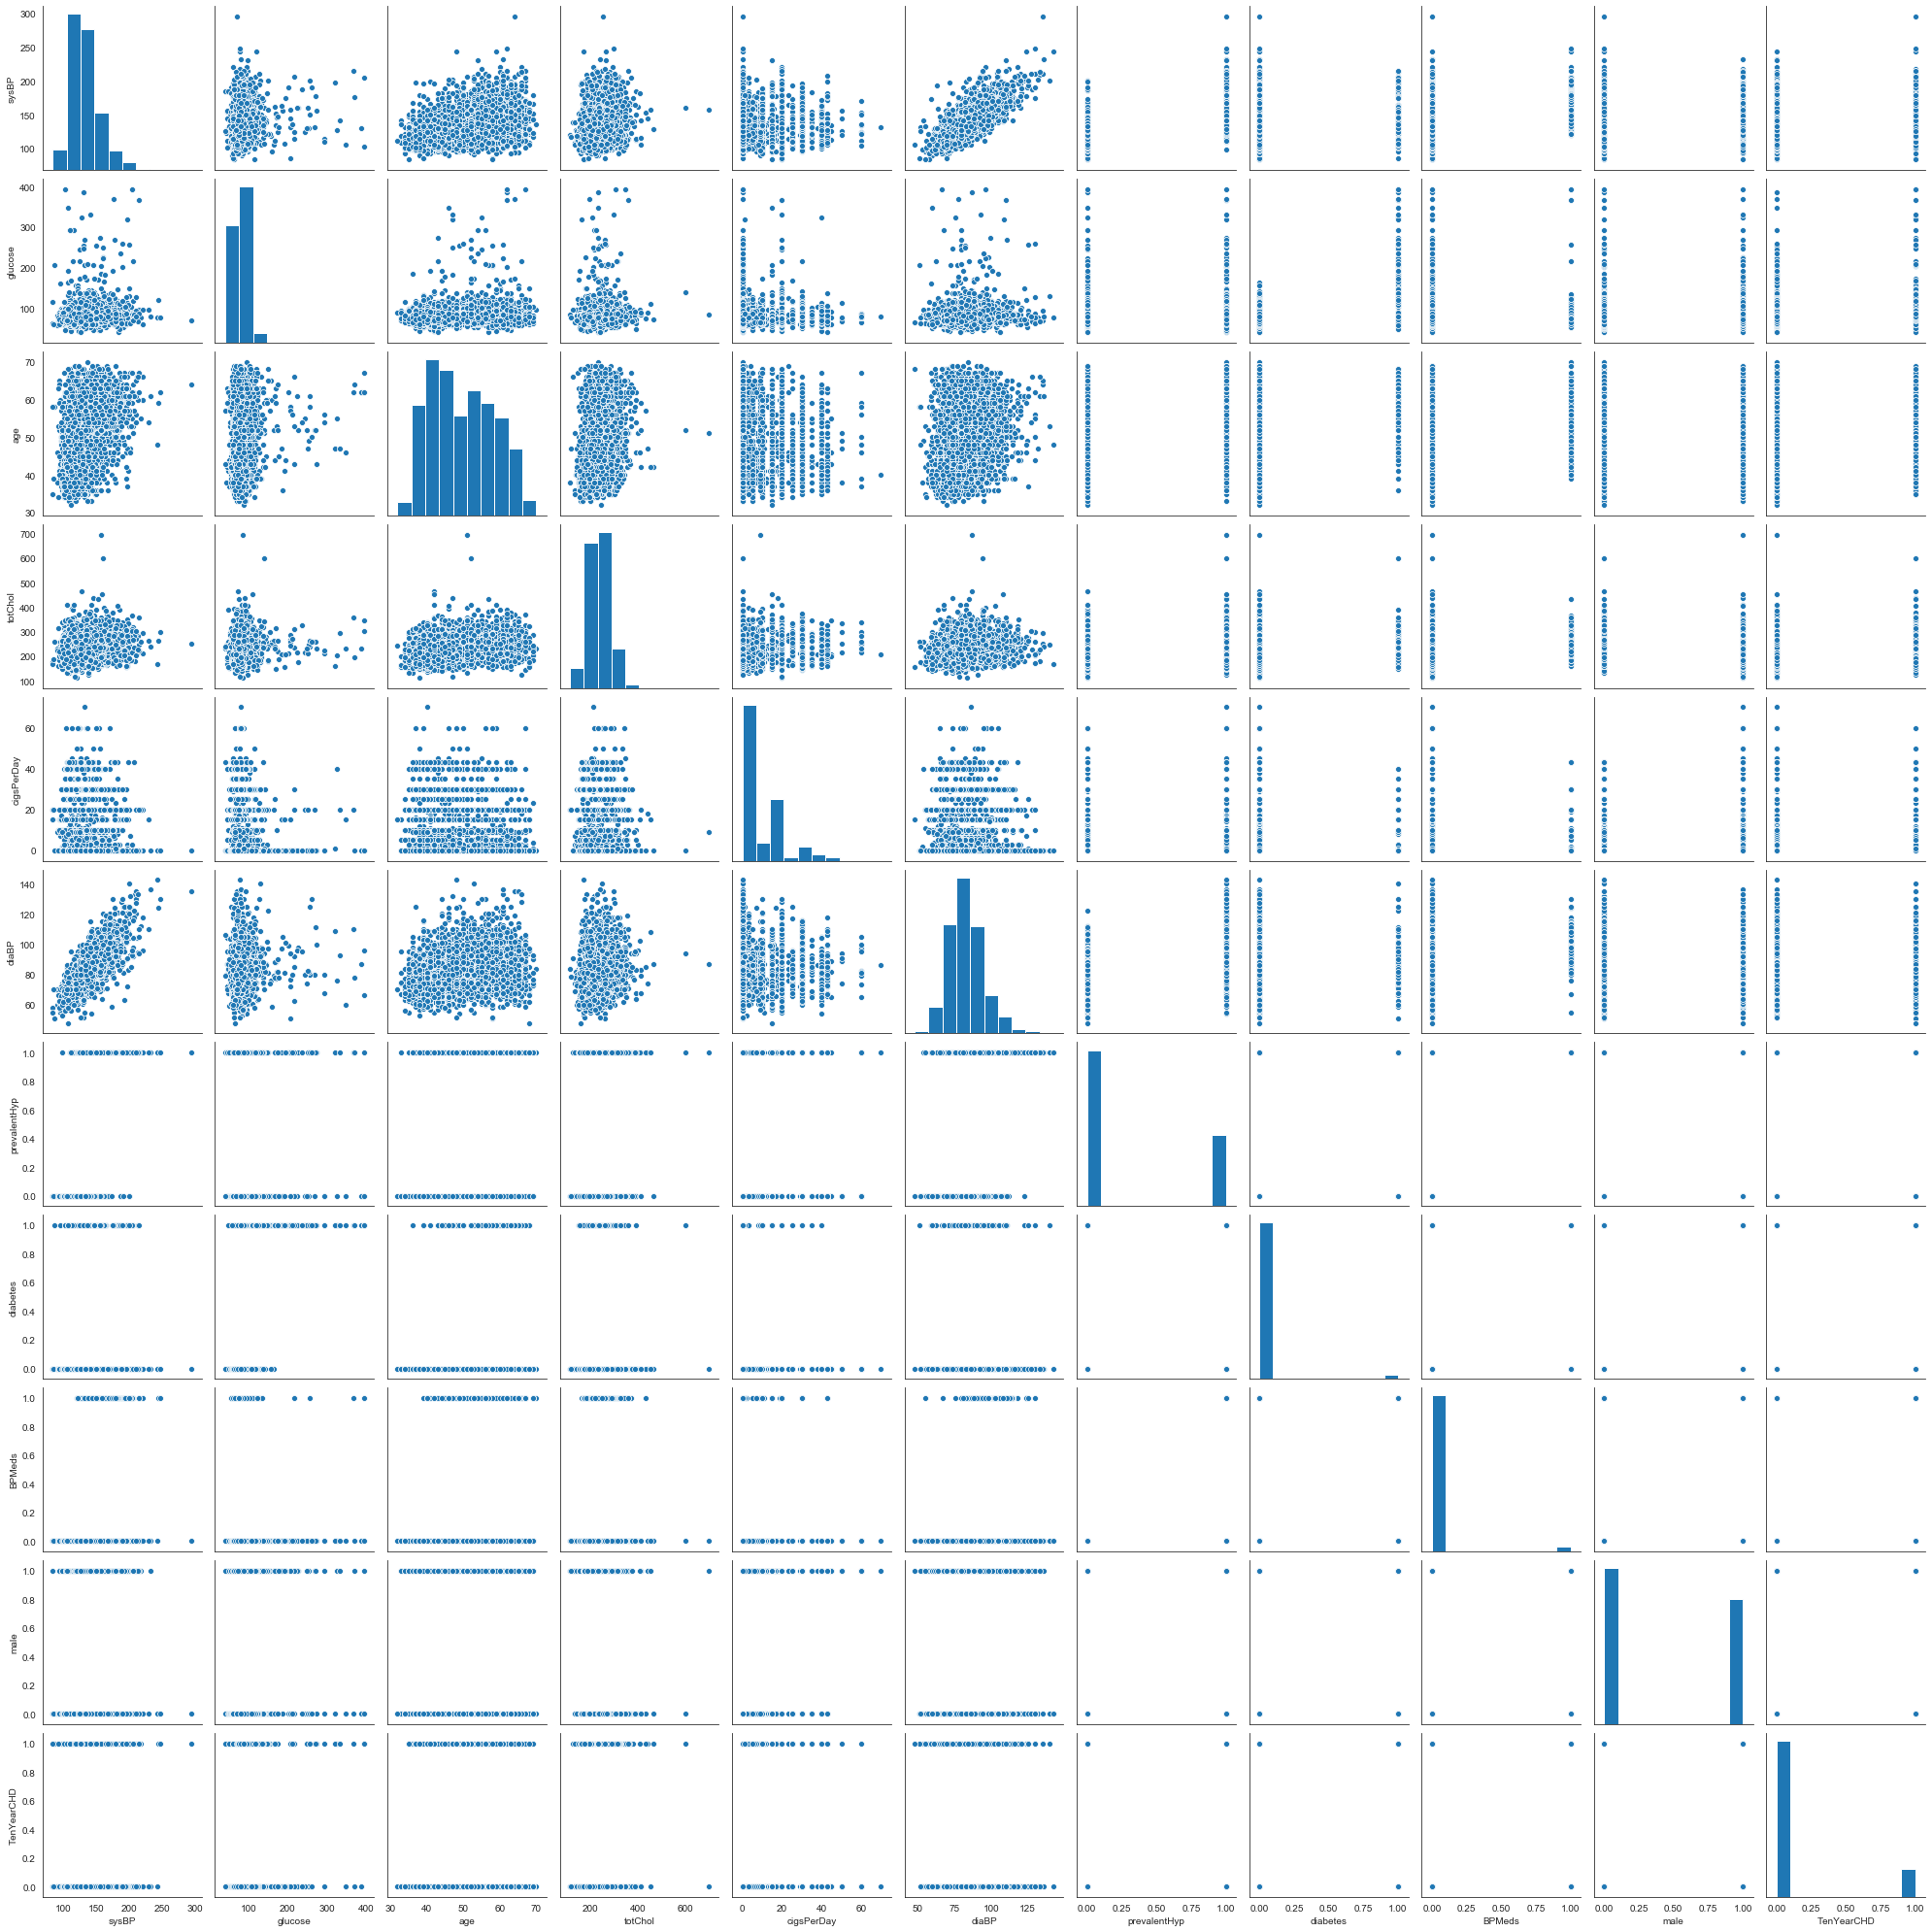

In [23]:
sb.pairplot(newdata)

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
1111,159.5,140.0,52,600.0,0.0,94.0,1,1,0.0,0,1
3160,157.0,84.0,51,696.0,9.0,87.0,1,0,0.0,1,0


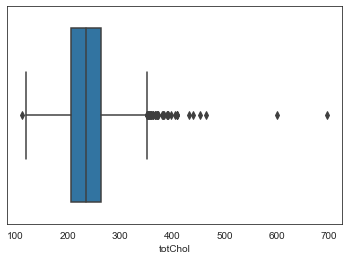

In [24]:
sb.boxplot(newdata.totChol)
outliers =newdata[(newdata['totChol'] > 500)] 
outliers

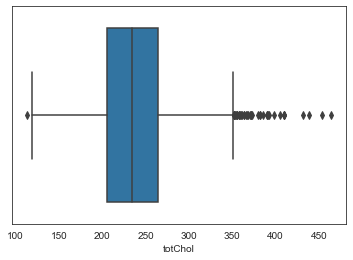

In [25]:
newdata= newdata.drop(newdata[newdata.totChol > 599].index)
sb.boxplot(newdata.totChol)
newdata_clean=newdata

In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler(feature_range=(0,1)) 
newdata_scaled = pd.DataFrame(scaler.fit_transform(newdata_clean), columns=newdata_clean.columns)

In [27]:
newdata_scaled.describe()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,0.230991,0.118260,0.462432,0.352447,0.128728,0.369677,0.311550,0.026941,0.030408,0.445185,0.152307
std,0.104228,0.067429,0.225589,0.124179,0.170391,0.126290,0.463189,0.161931,0.171730,0.497053,0.359366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.158392,0.087571,0.263158,0.264957,0.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.210402,0.107345,0.447368,0.344729,0.000000,0.359788,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.283688,0.132768,0.631579,0.430199,0.285714,0.444444,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Test and Train Split

In [28]:
y = newdata_scaled['TenYearCHD']
X = newdata_scaled.drop(['TenYearCHD'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=31)

In [29]:
print(len(X_train))
print(len(X_test))

2249
1500


# MODEL SELECTION AND ACCURACY

## KNN Algorithm (k-nearest neighbour)

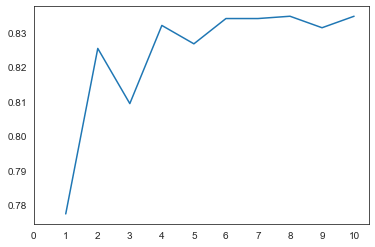

Accuracies for different values of n are: [0.77733333 0.82533333 0.80933333 0.832      0.82666667 0.834
 0.834      0.83466667 0.83133333 0.83466667]
KNearestNeighors performs best at n = 8  with a accuracy of  0.8346666666666667
[0. 0. 0. ... 0. 0. 0.]


In [30]:
#model selection
#accuracy
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
acc_index=list(range(1,11))
acc=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    acc=acc.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
plt.plot(acc_index, acc)
plt.xticks(x)
plt.show()
print('Accuracies for different values of n are:',acc.values)
final_acc = list(acc.values)
print('KNearestNeighors performs best at n =',final_acc.index(max(final_acc))+1,' with a accuracy of ',max(final_acc))
best = final_acc.index(max(final_acc))+1
model=KNeighborsClassifier(n_neighbors=best) 
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print(prediction)

#### KNearestNeighors performs best at n = 8  with a accuracy of  0.8346666666666667

#### The KNN Algorithm accuracy (in %)=83%

# Random Forest Classification Algorithm

In [31]:
# Random Forest Classification
accuracies = {}
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)

acc = rf.score(X_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 83.67%


# DecisionTreeClassifier Algorithm

In [32]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

acc = dtc.score(X_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 75.47%


# Naive Bayes Algorithm

In [33]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

acc = nb.score(X_test,y_test)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 82.27%


# Support vector Machine Algorithm

In [34]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)

acc = svm.score(X_test,y_test)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 83.33%


## Logistic Regression

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('framingham.csv')

In [36]:
data.drop(['education'],axis=1,inplace=True)
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [37]:
data.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [38]:
data.dropna(axis=0,inplace=True)

In [39]:
X=data.iloc[:,0:14]
Y=data.iloc[:,14]

In [40]:
X

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0


In [41]:
Y

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4237    0
4238    0
4239    0
Name: TenYearCHD, Length: 3751, dtype: int64

In [42]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
smote=SMOTE(random_state=0)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=0)
x_data,y_data=smote.fit_sample(x_train,y_train)

In [43]:
x_data

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,41,1,20.000000,0.000000,0,1,0,196.000000,154.000000,99.000000,23.460000,82.000000,56.000000
1,1,49,1,20.000000,0.000000,0,0,0,288.000000,128.000000,89.000000,35.960000,73.000000,75.000000
2,0,54,1,20.000000,0.000000,0,0,0,225.000000,131.000000,79.000000,25.910000,67.000000,62.000000
3,1,63,0,0.000000,0.000000,0,1,0,161.000000,196.000000,102.000000,28.430000,56.000000,88.000000
4,1,46,0,0.000000,0.000000,0,1,0,256.000000,138.000000,105.000000,26.970000,98.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3823,1,50,1,20.000000,0.000000,0,0,0,226.958725,126.178066,76.602593,23.771909,84.109671,96.972880
3824,0,55,0,9.729336,0.972934,0,1,1,241.189465,174.703726,98.163854,29.601095,90.460129,134.864668
3825,0,65,1,20.000000,0.000000,0,1,0,235.277188,149.600314,87.292501,27.639450,75.384374,86.954063
3826,1,54,0,0.000000,0.000000,0,0,0,313.845766,136.538306,86.115676,27.256381,70.153226,77.076613


In [44]:
y_data

0       0
1       0
2       0
3       0
4       0
       ..
3823    1
3824    1
3825    1
3826    1
3827    1
Name: TenYearCHD, Length: 3828, dtype: int64

#### Recursive Feature Elimination

In [45]:
col=x_data.columns
col

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [46]:
import warnings
warnings.simplefilter(action='ignore')
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
rfecv=RFECV(estimator=LogisticRegression(),step=1,cv=10,scoring='accuracy')
rfecv.fit(x_data,y_data.values.ravel())
print("Optimal no. of features: %d" % rfecv.n_features_)
print("Selected features: %s" % list(x_data.columns[rfecv.support_]))

Optimal no. of features: 9
Selected features: ['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'heartRate']


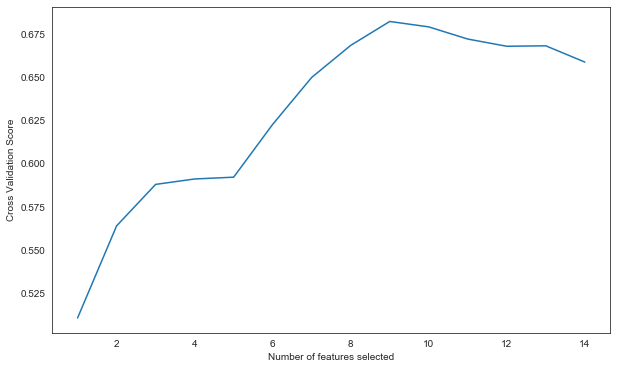

In [47]:
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross Validation Score")
plt.plot(range(1,len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.show()

In [48]:
#Using RFE, following columns have been chosen:
cols=['male','age','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','heartRate']

In [49]:
import statsmodels.api as sm
l_model=sm.Logit(Y,X)
res=l_model.fit()
print(res.summary2())

Optimization terminated successfully.
         Current function value: 0.400050
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.063     
Dependent Variable: TenYearCHD       AIC:              3029.1721 
Date:               2020-09-11 00:33 BIC:              3116.3890 
No. Observations:   3751             Log-Likelihood:   -1500.6   
Df Model:           13               LL-Null:          -1601.7   
Df Residuals:       3737             LLR p-value:      4.7231e-36
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
male               0.4089   0.1028  3.9764 0.0001  0.2073  0.6104
age                0.0286   0.0057  4.9894 0.0000  0.0174  0.0398


#### Logistic Regression

#### Model Fitting

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
x_data=x_data[cols]
x_test=x_test[cols]

In [51]:
lr=LogisticRegression()
lr.fit(x_data,y_data)
y_pred=lr.predict(x_test)
y_pred_proba=lr.predict_proba(x_test)[:, 1]
[fpr,tpr,thr]=roc_curve(y_test,y_pred_proba)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("log_loss:",log_loss(y_test,y_pred_proba))
print("auc:",auc(fpr,tpr))
acc=accuracy_score(y_test,y_pred)*100
accuracies['Logistic Regression']=acc

Accuracy: 0.6455696202531646
log_loss: 0.6273546148257667
auc: 0.673646747504522


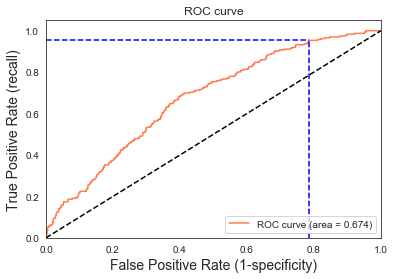

In [52]:
idx=np.min(np.where(tpr>0.95))
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr,tpr))
plt.plot([0,1],[0,1],'k--')
plt.plot([0,fpr[idx]],[tpr[idx],tpr[idx]],'k--',color='blue')
plt.plot([fpr[idx],fpr[idx]],[0,tpr[idx]],'k--',color='blue')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate (1-specificity)',fontsize=14)
plt.ylabel('True Positive Rate (recall)',fontsize=14)
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [53]:
confusion_matrix(y_test, y_pred)

array([[831, 434],
       [ 98, 138]], dtype=int64)

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.66      0.76      1265
           1       0.24      0.58      0.34       236

    accuracy                           0.65      1501
   macro avg       0.57      0.62      0.55      1501
weighted avg       0.79      0.65      0.69      1501



#### K-fold Cross Validation

In [55]:
# 10-fold cross-validation logistic regression
logreg = LogisticRegression()
# Use cross_val_score function
# We are passing the entirety of X and y since cross validation takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric
accuracy_score = cross_val_score(logreg, X, Y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, Y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, Y, cv=10, scoring='roc_auc')

print('K-fold cross-validation results:')
print("Average accuracy:",accuracy_score.mean())
print("Average log_loss:",-scores_log_loss.mean())
print("Average auc:",scores_auc.mean())

K-fold cross-validation results:
Average accuracy: 0.8483056737588652
Average log_loss: 0.40106452272480436
Average auc: 0.6772089403449335


# Comparing Models

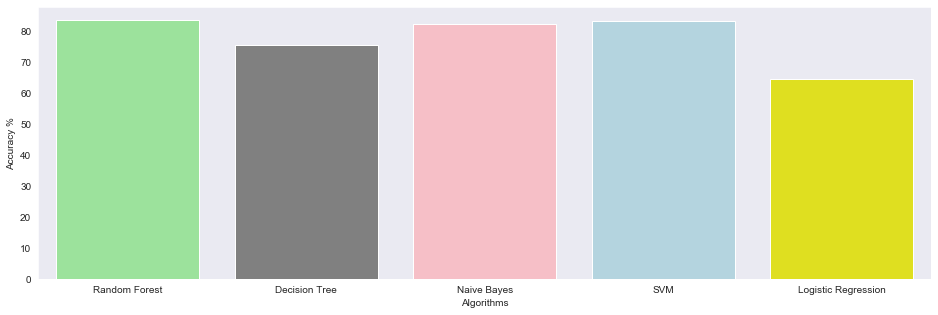

In [59]:
colors = ["lightgreen", "gray", "lightpink", "lightblue", "yellow"]
sb.set_style("dark")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sb.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()